In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import itertools
import seaborn as sns
sns.set()

In [2]:
p_info = pd.read_csv('participants_data.csv')

In [3]:
summary = pd.DataFrame()
for pid in p_info['pid']:
    data = pd.read_csv('result/' + pid + '_KVIQ.csv', index_col=0)
    summary = summary.append(data)

C:\Users\OKAMOTO_LAB\Anaconda3\Lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


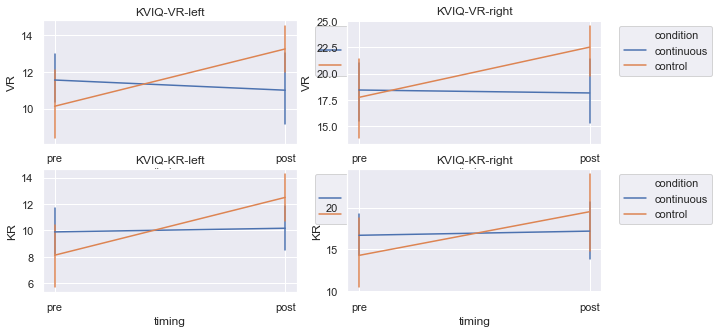

In [4]:
data = summary.groupby(['pid', 'condition', 'timing', 'hand'], as_index=False, sort=None).sum()
plt.figure(figsize=(10,5))
for i, (img, hand) in enumerate(itertools.product(['VR', 'KR'], ['left', 'right'])):
    plt.subplot(2, 2, i+1)
    sns.lineplot(x='timing', y=img, hue='condition', sort=False, err_style='bars', data=data[data.hand == hand])
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.title('KVIQ-' + img + '-' + hand)

In [10]:
total = summary.groupby(['pid', 'condition', 'timing'], sort=False, as_index=False).sum()
total['score'] = total['VR'] + total['KR']

C:\Users\OKAMOTO_LAB\Anaconda3\Lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


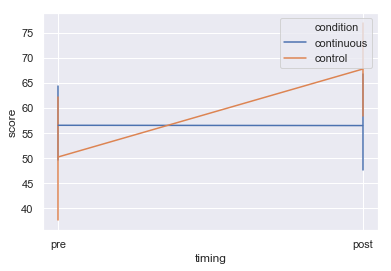

In [14]:
sns.lineplot(x='timing', y='score', hue='condition', err_style='bars', sort=False, data=total)
plt.savefig('result_img/KVIQ.png')